In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')

In [2]:
# ejercicio 4 (calculo de mejora de batching contra greedy)

df['cost_gap%'] = (df['greedy_cost'] - df['batching_cost']) / df['greedy_cost']

# gap entre tiempo de greedy y tiempo batching
df['time_gap%'] = (df['greedy_time'] - df['batching_time']) / df['greedy_time']

# gap en rendimiento $/km
df['yield_gap%'] = (df['greedy_benefit'] - df['batching_benefit']) / df['greedy_benefit']

In [3]:
# Tamaños de muestras por los cuales agrupar
sample_sizes = [10, 100, 250, 500]

# Agrupamos la data por tamaño de muestra y calculamos la media para columna
grouped_df = df.groupby('n').mean().reset_index()

# Tabla comparitiva cambios porcentuales entre Greedy y Batching
columns = ['n','cost_gap%','time_gap%','yield_gap%']
comparative_table = (grouped_df[columns] * 100).round(2)
print(comparative_table)

       n  cost_gap%  time_gap%  yield_gap%
0   1000      14.74   -4781.68      -12.78
1  10000      16.90   -6266.95       -4.00
2  25000      17.32   -6073.37        1.04
3  50000      14.57   -4761.56       16.67


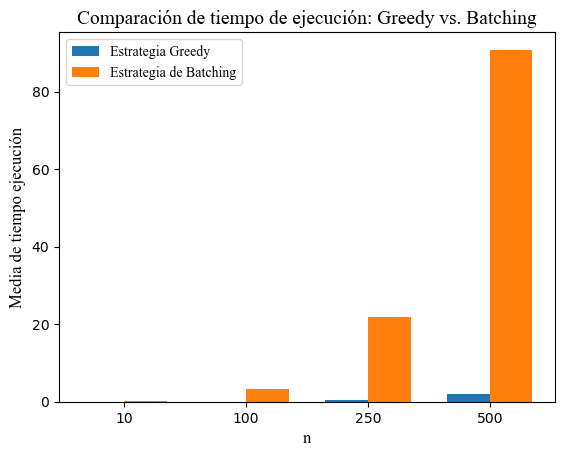

In [4]:
# Extraemos las medias de tiempo de ejecución
greedy_time = grouped_df['greedy_time']
batching_time = grouped_df['batching_time']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_time, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_time, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
label_font = {'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight': 'medium'}
plt.xlabel('n', **label_font)
plt.ylabel('Media de tiempo ejecución', **label_font)
title_font = {'fontname': 'Times New Roman', 'fontsize': 14, 'fontweight': 'medium'}
plt.title('Comparación de tiempo de ejecución: Greedy vs. Batching', **title_font)
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend(prop= 'Times New Roman')
plt.show()

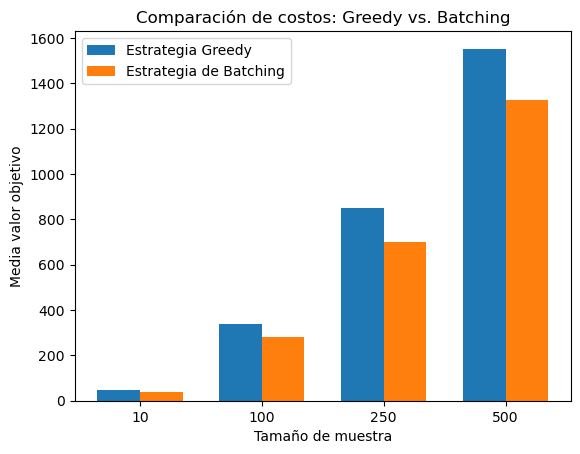

In [5]:
# Extraemos las medias de valor objetivo
greedy_ov = grouped_df['greedy_cost']
batching_ov = grouped_df['batching_cost']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_ov, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_ov, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de costos: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

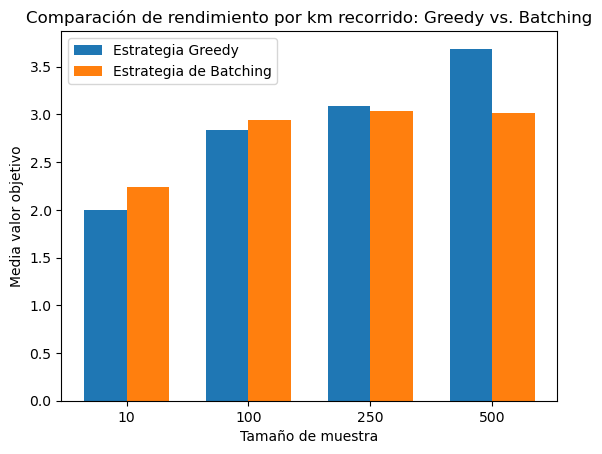

In [6]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
greedy_rend_km = grouped_df['greedy_benefit']
batching_rend_km = grouped_df['batching_benefit']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_rend_km, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

In [7]:
columns_g = ['n','greedy_cost','greedy_time','greedy_benefit']
columns_b = ['n','batching_cost','batching_time','batching_benefit']
columns_a = ['n','alternative_cost','alternative_time','alternative_benefit']

table_greedy = (grouped_df[columns_g])
table_batching = (grouped_df[columns_b])
table_alternative = (grouped_df[columns_a])

# Convert DataFrame to Markdown table
table_g = table_greedy.to_markdown(index=False)
table_b = table_batching.to_markdown(index=False)
table_a = table_alternative.to_markdown(index=False)

# Save table to a .md file
with open('table_g.md', 'w') as file:
    file.write(table_g)

with open('table_b.md', 'w') as file:
    file.write(table_b)

with open('table_a.md', 'w') as file:
    file.write(table_a)

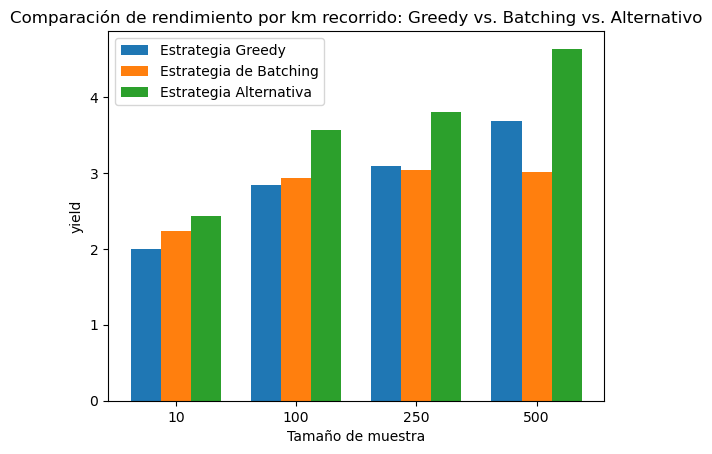

In [9]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
greedy_rend_km = grouped_df['greedy_benefit']
batching_rend_km = grouped_df['batching_benefit']
alternative_rend_km = grouped_df['alternative_benefit']

# Posicionamiento de las barras
bar_width = 0.25
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_rend_km, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')
plt.bar(r3, alternative_rend_km, width=bar_width, label='Estrategia Alternativa')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('yield')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching vs. Alternativo')
plt.xticks([r + bar_width for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()